In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb


In [4]:
file_path = 'data.xlsx'
data = pd.read_excel(file_path)

data.head()

,№,Hudud nomi,Loyiha nomi,Maydoni,Soha,Loyiha umumiy qiymati,Ish o'rni,NPV,IRR,Loyiha qoplash muddati
0,1,Samarqand,Oqsil biomassasi - bioprotein ishlab chiqarish...,0.2,Sanoat,31.8,100,8.8,18.6,72.0
1,2,Samarqand,Keramo va metallogranit ishlab chiqarishni tas...,20.0,Sanoat,27.7,60,1.4,19.5,96.0
2,3,Samarqand,Bir martalik tibbiyot anjomlari (shprits siste...,0.5,Sanoat,20.5,40,1.8,14.2,72.0
3,4,Samarqand,Madaniy kavrak o‘simligini yetishtirish va qay...,20.0,Sanoat,10.0,100,2.7,14.0,96.0
4,5,Samarqand,Oshqovoq va olma mahsulotlarini qayta ishlash ...,0.5,Sanoat,10.0,30,2.9,24.1,72.0


In [5]:
columns_of_interest = ['Loyiha umumiy qiymati', 'Ish o\'rni', 'NPV', 'IRR', 'Loyiha qoplash muddati']
data_filtered = data[columns_of_interest]

# Remove outliers by removing the 10 largest and 10 smallest values from each column
def remove_outliers(df, num_outliers=10):
    df_cleaned = df.apply(lambda x: x.sort_values().iloc[num_outliers:-num_outliers].reset_index(drop=True))
    return df_cleaned

data_cleaned = remove_outliers(data_filtered)



In [7]:
X = data_cleaned.drop(columns=['NPV'])
y = data_cleaned['NPV']

In [31]:
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Save the best model
joblib.dump(best_model, 'npv_best_model.pkl')

# Evaluate the best model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Best Parameters: {grid_search.best_params_}')

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mean Squared Error: 0.007799518618767391
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

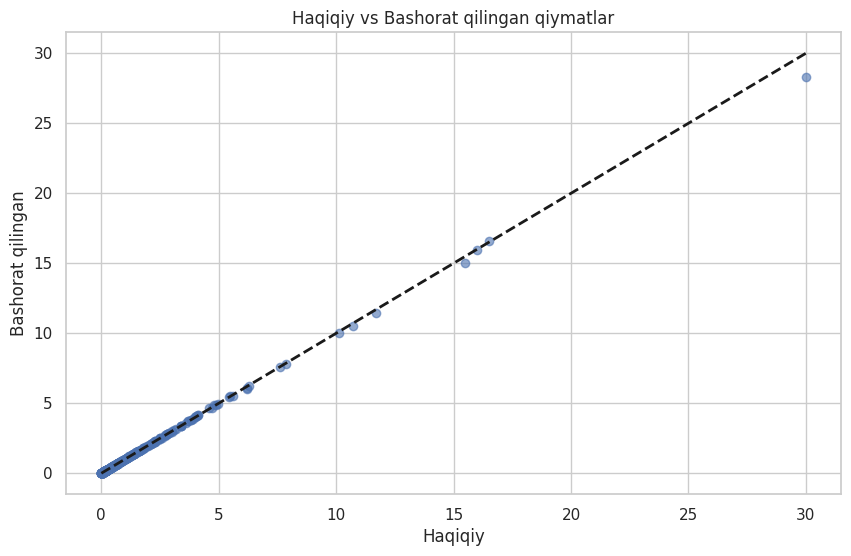

['npv_model.pkl']

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Haqiqiy')
plt.ylabel('Bashorat qilingan')
plt.title('Haqiqiy vs Bashorat qilingan qiymatlar')
plt.show()

# Display error metrics
mse, r2
joblib.dump(model, 'npv_model.pkl')


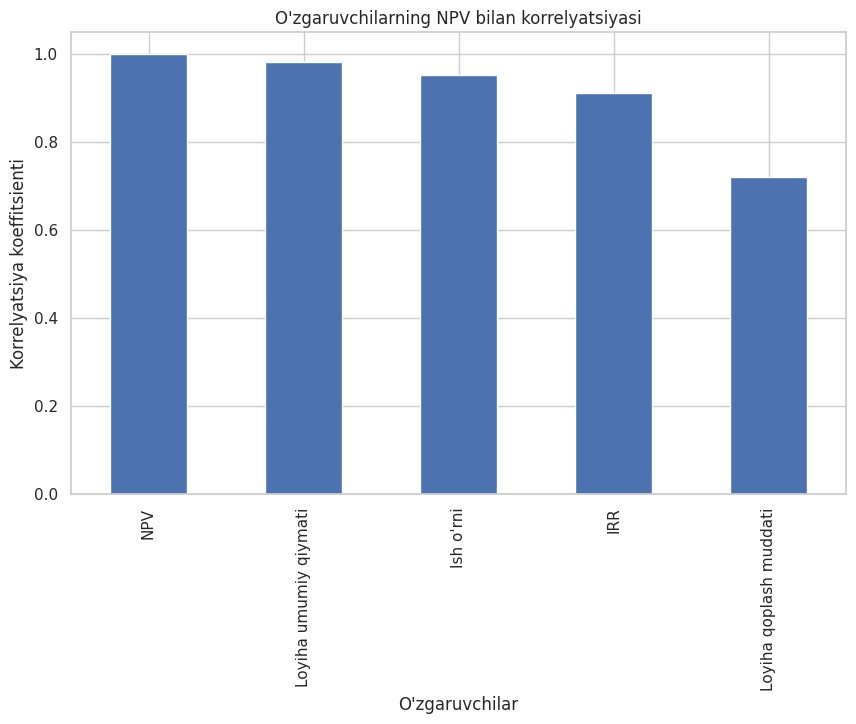

In [24]:
correlation_matrix = data_cleaned.corr()

# Plot a barplot of the correlations
plt.figure(figsize=(10, 6))
correlation_matrix['NPV'].sort_values(ascending=False).plot(kind='bar')
plt.title('O\'zgaruvchilarning NPV bilan korrelyatsiyasi')
plt.ylabel('Korrelyatsiya koeffitsienti')
plt.xlabel('O\'zgaruvchilar')
plt.show()

In [22]:
import pandas as pd

# Load the data
data = pd.read_excel('data.xlsx')

# Calculate statistics for each region
region_stats_uzbek = data.groupby('Hudud nomi').agg({'№': 'count', 'NPV': 'mean'}).reset_index()
region_stats_uzbek.columns = ['Hudud nomi', 'Loyihalar Soni', "O'rtacha NPV"]

# Add manual coordinates
region_coords_uzbek = {
    "Samarqand": (39.654, 66.974),
    "Toshkent": (41.313, 69.277),
    "Buxoro": (39.774, 64.428),
    "Qashqadaryo": (38.839, 66.179),
    "Surxondaryo": (37.233, 67.278),
    "Farg‘ona": (40.384, 71.786),
    "Namangan": (41.000, 71.672),
    "Andijon": (40.783, 72.352),
    "Navoiy": (40.101, 65.374),
    "Jizzax": (40.117, 67.842),
    "Xorazm": (41.556, 60.640),
    "Qoraqalpog‘iston Respublikasi": (42.485, 59.603)
}

# Convert the dictionary to a DataFrame
regions_coordinates_uzbek = pd.DataFrame(region_coords_uzbek.items(), columns=['Hudud nomi', 'Coordinates'])
regions_coordinates_uzbek[['Latitude', 'Longitude']] = pd.DataFrame(regions_coordinates_uzbek['Coordinates'].tolist(), index=regions_coordinates_uzbek.index)
regions_coordinates_uzbek = regions_coordinates_uzbek.drop(columns=['Coordinates'])

# Merge the coordinates with region stats
region_stats_uzbek = region_stats_uzbek.merge(regions_coordinates_uzbek, on='Hudud nomi', how='left')

# Drop Latitude and Longitude columns
region_stats_uzbek = region_stats_uzbek.drop(columns=['Latitude', 'Longitude'])

# Display the results
print(region_stats_uzbek)
region_stats_uzbek.to_excel('region_stats_uzbek.xlsx', index=False)



          Hudud nomi  Loyihalar Soni  O'rtacha NPV
0            Andijon             240      0.294955
1             Buxoro             200      6.236165
2           Farg'ona             120      0.568908
3             Jizzax             127      0.665056
4           Namangan              80      0.316840
5             Navoiy             124      0.846707
6        Qashqadaryo             201      2.757323
7   Qoraqalpog'iston             322      1.055125
8          Samarqand             201  41953.570762
9        Surxondaryo             320      1.345244
10          Toshkent             120      2.369943
11            Xorazm             161      0.485652


In [32]:
import joblib

# Load the best model
best_model = joblib.load('npv_best_model.pkl')

# Function to predict NPV based on user inputs
def predict_npv():
    # User inputs
    loyha_umumiy_qiymati = float(input("Loyiha umumiy qiymatini kiriting: "))
    ish_orni = int(input("Ish o'rni kiriting: "))
    irr = float(input("IRR kiriting: "))
    loyiha_qoplash_muddati = float(input("Loyiha qoplash muddatini kiriting: "))

    # Prepare input data
    input_data = pd.DataFrame([[loyha_umumiy_qiymati, ish_orni, irr, loyiha_qoplash_muddati]],
                              columns=['Loyiha umumiy qiymati', 'Ish o\'rni', 'IRR', 'Loyiha qoplash muddati'])

    # Predict NPV
    predicted_npv = best_model.predict(input_data)

    # Display the result
    print(f"Bashorat qilingan NPV: {predicted_npv[0]}")

# Call the function
predict_npv()


Loyiha umumiy qiymatini kiriting: 55
Ish o'rni kiriting: 65
IRR kiriting: 78
Loyiha qoplash muddatini kiriting: 78
Bashorat qilingan NPV: 7.549514152682052
